In [1]:
#importing Libraries
from datetime import datetime
start =datetime.now()

import pandas as pd  #for Dataframe
import glob #for reading dataset files 

#Datapreprocessing part
print("Getting files..")
print("buisness type files")
buisness=(glob.glob("../data/buisness/*.txt"))

print("entertainment type files")

entertainment=(glob.glob("../data/entertainment/*.txt"))
print("politics type files")
politics=(glob.glob("../data/politics/*.txt"))

print("sport type files")
sport=(glob.glob("../data/sport/*.txt"))

print(" tech type files")
tech=(glob.glob("../data/tech/*.txt"))

#meta veriables for the Dataframe
category = []
file_name =[]
title = []
content = []


Getting files..
buisness type files
entertainment type files
politics type files
sport type files
 tech type files


In [2]:
def Create_Data(cate):
    #Filter
    
    print("Creating "+cate+" data...")
    if(cate is 'business'):
        field = buisness
    if(cate is 'entertainment'):
        field = entertainment
    if(cate is 'politics'):
        field = politics
    if(cate is 'sport'):
        field = sport
    if(cate is 'tech'):
        field = tech
    for textfile in field:
        try :
            with open(textfile) as f:
                rawcontentarray = f.read().splitlines()
                rawcontent = ""
                title.append(rawcontentarray[0])
                for i in range(2,len(rawcontentarray)):
                    rawcontent+=rawcontentarray[i]
                content.append(rawcontent)
                category.append(cate)
                file_name.append(textfile[textfile.rfind('/')+1:])
        except Exception as error:
            print("ERROR!")
            print(cate)
            print(rawcontentarray[0])
            print(textfile)
            print(rawcontent)
            print(file_name[-1])
            print(title[-1])
            print(content[-1])
            print(error)

Create_Data("business")
Create_Data("entertainment")
Create_Data("politics")
Create_Data("sport")
Create_Data("tech")

print("Cate\tFile\tTitle\tContent")
print(str(len(category))+"\t"+str(len(file_name))+"\t"+str(len(title))+"\t"+str(len(content)))

Creating business data...
Creating entertainment data...
Creating politics data...
Creating sport data...
ERROR!
sport
Mourinho expects fight to finish
../data/sport/199.txt
Chelsea manager Jose Mourinho expects the Champions League clash with Barcelona to be a fight to the finish.Mourinho is relishing the first leg of the tie against his former club in the last 16 in the Nou Camp. He said: "I wouldn't be surprised if nothing had been decided by the last minute of the return leg and the match had to go into extra time. "I have to defend what is mine and the Champions League is mine at the moment. I'm the last manager to have won it." Mourinho never coached Barcelona, assisting both Sir Bobby Robson and Louis van Gaal. But he is not envious, insisting: "I don't have to be jealous about Barcelona because they have 100 years of history and have won the European Cup once."I have been managing for five years and I have the same amount of Champions League trophies to my name." Barcelona star

In [3]:
#check extractedData
if (len(category)==len(file_name)==len(title)==len(content)):
    print("Data creation Successfull !")
else :
    print("Unsuccessfull data Creation !")
#import data to dataset
print("Importing Data ...")
dataSet=list(zip(category,file_name,title,content))
dataFrame=pd.DataFrame(data=dataSet,columns=['category','filename','title','content'])
print("Exporting Data")
dataFrame.to_csv('data.csv',index=False,header=True)
print("Done")

Data creation Successfull !
Importing Data ...
Exporting Data
Done


In [4]:
createdatetime=datetime.now()-start
dataFrame['category_id']=dataFrame['category'].factorize()[0]
category_id_dataFrame=dataFrame[['category','category_id']].drop_duplicates().sort_values('category_id')
category_to_id=dict(category_id_dataFrame.values)
id_to_categories=dict(category_id_dataFrame[['category_id','category']].values)


Data Exploration
---

,category,filename,title,content,category_id
0,entertainment,288.txt,Rapper 50 Cent ends protege feud,Rapper 50 Cent has ended his public feud with ...,0
1,entertainment,230.txt,Aaliyah claim dismissed by court,Late R&B star Aaliyah's record company has fai...,0
2,entertainment,152.txt,"Beatles suits sell for $110,000",Four suits worn by the Beatles on their Please...,0
3,entertainment,326.txt,Oscars steer clear of controversy,The Oscars nominations list has left out some ...,0
4,entertainment,373.txt,British stars denied major Oscars,British hopes of winning major Oscars were das...,0


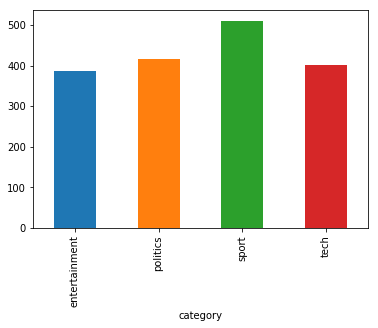

In [9]:
dataFrame.sample(5,random_state=0)
dataFrame.groupby('category').filename.count().plot.bar(ylim=0)
dataFrame.head()

Data Preprocessing
---
in this part we convert the text of the documents to find Term Frequency , Inverse Document Frequency , abbreviated to tf-idf ; which will represent a words' importance in each document.

`sublinear_df` is set to `True` to use log form for frequency , to give diminishing returns as the frequency of a word increases.

`min_dif` is the min. numbers of documents a word must be present in to be kept , this is to avoid rare words 

`norm` is set to `12`

`encoding` is set to `latin-1` which is used in the training document.

`ngram_rage` is set to `(1,2)` to indicate that we want to consider both unigrams and bigrams or in other terms 

`stop_words` is set to `english` to remove all common pronouns and further reduce the number of noisy features.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer #will be used to calculate 'tf-idf' vector for each of our documents

tfidf=TfidfVectorizer(sublinear_tf=True,min_df=5,norm='l2',encoding='latin-1',ngram_range=(1,2),stop_words='english')

features=tfidf.fit_transform(dataFrame.content).toarray()
labels=dataFrame.category_id
features.shape

(1714, 11841)

In [7]:
from sklearn.feature_selection import chi2
import numpy as np

N=3
for category, category_id in sorted(category_to_id.items()):
    features_chi2=chi2(features,labels==category_id)
    indices=np.argsort(features_chi2[0])
    features_names=np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in features_names if len(v.split(' '))==1]
    bigrams = [v for v in features_names if len(v.split(' '))==2]
    print("# '{}':".format(category))
    print(" .Most correlated unigrams :\n     . {}".format('\n'.join(unigrams[-N:])))
    print(" .Most correlated unigrams :\n     . {}".format('\n'.join(bigrams[-N:])))

# 'entertainment':
 .Most correlated unigrams :
     . singer
actor
film
 .Most correlated unigrams :
     . film festival
los angeles
box office
# 'politics':
 .Most correlated unigrams :
     . government
election
labour
 .Most correlated unigrams :
     . tony blair
prime minister
mr blair
# 'sport':
 .Most correlated unigrams :
     . coach
match
cup
 .Most correlated unigrams :
     . grand slam
australian open
champions league
# 'tech':
 .Most correlated unigrams :
     . software
technology
users
 .Most correlated unigrams :
     . anti virus
mobile phones
mobile phone


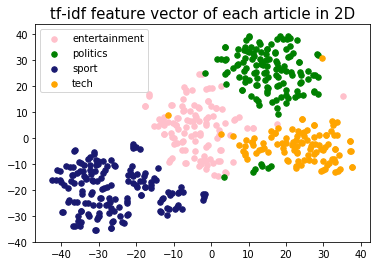

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Sample_SIZE=int(len(features)*0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)),size=Sample_SIZE,replace=False)
projected_features=TSNE(n_components=2,random_state=0).fit_transform(features[indices])
colors=['pink','green','midnightblue','orange','darkgrey']
for category,category_id in sorted(category_to_id.items()):
    points=projected_features[(labels[indices]==category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
    plt.title("tf-idf feature vector of each article in 2D",fontdict=dict(fontsize=15))
    plt.legend()
